##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [1]:
# Ad. 1 - Importowanie bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Ad. 2 - Odczyt danych
df = pd.read_csv('SCORES.csv')

df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [2]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [3]:
df.shape

(25, 2)

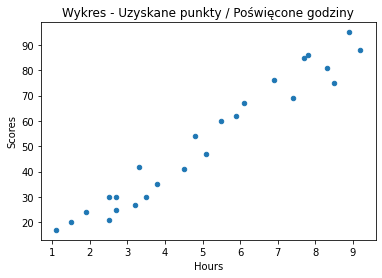

In [4]:
# Ad. 3 - Wykres
df.plot.scatter(x='Hours', y='Scores')
plt.title('Wykres - Uzyskane punkty / Poświęcone godziny')
plt.show()

In [5]:
# Ad. 4 - Podział danych
X = df['Hours']
y = df['Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
# Ad. 5 - Model regresji liniowej
rmodel = linear_model.LinearRegression()
rmodel.fit(X_train.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

In [7]:
# Ad. 6 - Wskaźniki coef_ oraz intercept_
rmodel.coef_

array([9.9620513])

Wskaźnik coef_ to współczynnik, przez który mnożymy każdą zmienną.

In [8]:
rmodel.intercept_

2.649840014851847

Wskaźnik intercept_ to oczekiwana średnia wartość y, gdy wszystkie wartości X byłyby równe zero,

In [9]:
# Ad. 7 - Predykcja dla części testowej X
y_pred = rmodel.predict(X_test.to_numpy().reshape(-1, 1))
print(f'Dane testowe:\n{y_test.values}\n')
print(f'Dane uzyskane z predykcji:\n{y_pred}')

Dane testowe:
[41 81 62 21 30 75 85 47]

Dane uzyskane z predykcji:
[47.47907088 85.33486584 61.42594271 27.55496828 27.55496828 87.3272761
 79.35763506 53.45630167]


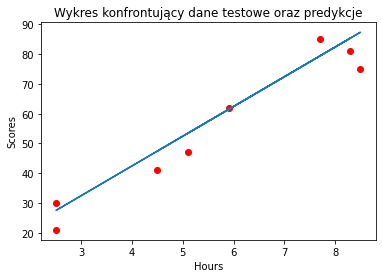

In [10]:
# Ad. 8 - Wykres konfrontujący dane testowe oraz predykcje
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred)
plt.title('Wykres konfrontujący dane testowe oraz predykcje')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [11]:
# Ad. 9 - Walidacja
print(f'Średni błąd bezwzględny (Mean Absolute Error): {sklearn.metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Błąd średniokwadratowy (Mean Squared Error): {sklearn.metrics.mean_squared_error(y_test, y_pred)}')
print(f'Pierwiastek błędu średniokwadratowego (Root Mean Squared Error): {sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False)}')


Średni błąd bezwzględny (Mean Absolute Error): 5.60174209083662
Błąd średniokwadratowy (Mean Squared Error): 41.94082523248583
Pierwiastek błędu średniokwadratowego (Root Mean Squared Error): 6.476173656757965


### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [12]:
# Realizacja zadania
df2 = pd.read_csv('PETROL.csv')
df2.head()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [13]:
df2.describe()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [14]:
df2.shape

(48, 5)

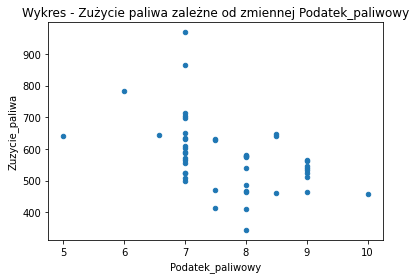

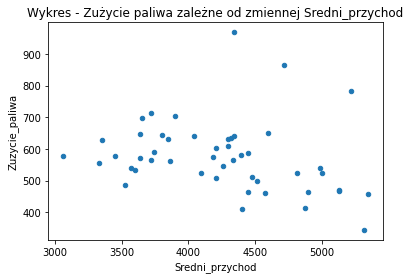

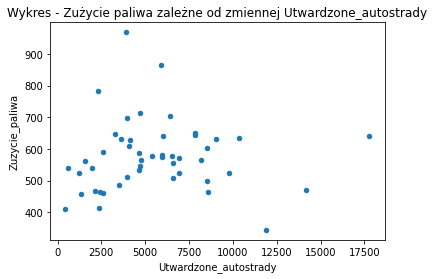

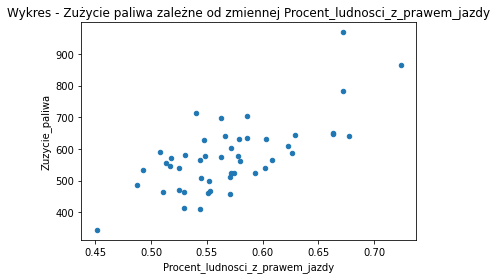

In [15]:
for i in df2.columns:
    if i == 'Zuzycie_paliwa':
        break
    df2.plot.scatter(x=i, y='Zuzycie_paliwa')
    plt.title('Wykres - Zużycie paliwa zależne od zmiennej ' + f'{i}')
    plt.show()

In [16]:
X = df2[['Podatek_paliwowy', "Sredni_przychod", "Utwardzone_autostrady", "Procent_ludnosci_z_prawem_jazdy"]]
y = df2['Zuzycie_paliwa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rmodel = linear_model.LinearRegression()
rmodel.fit(X_train, y_train)

print(f'coef_:\n{rmodel.coef_}\n')
print(f'intercept_:\n{rmodel.intercept_}\n')

y_pred = rmodel.predict(X_test)
print(f'Dane testowe:\n{y_test.values}\n')
print(f'Dane uzyskane z predykcji:\n{y_pred}')

coef_:
[-5.61471243e+01 -7.57380022e-02 -8.46246174e-03  1.09538713e+03]

intercept_:
750.8552731737996

Dane testowe:
[525 464 487 344 534 457 554 414 574 571 410 577 541 471 865]

Dane uzyskane z predykcji:
[563.10279975 413.66041264 538.35183589 292.41494505 473.47401687
 398.9772125  611.52276717 520.47231483 550.62727132 591.11631054
 560.75008521 595.11696395 533.42716783 396.54860308 743.64980637]


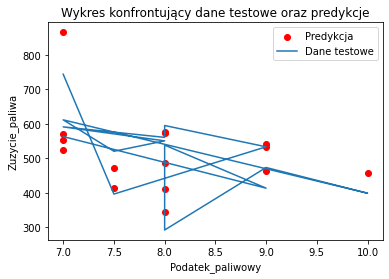

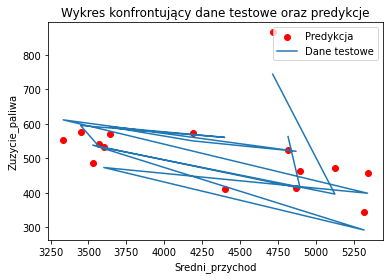

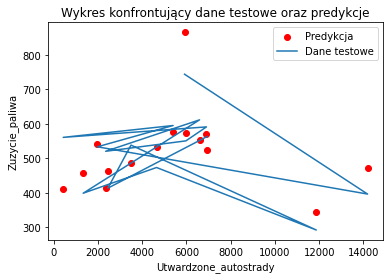

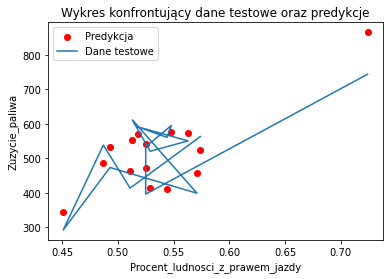

In [17]:
for i in df2.columns:
    if i == 'Zuzycie_paliwa':
        break
    plt.scatter(X_test[i], y_test, color='red')
    plt.plot(X_test[i], y_pred)
    plt.title('Wykres konfrontujący dane testowe oraz predykcje')
    plt.xlabel(i)
    plt.ylabel('Zuzycie_paliwa')
    plt.legend(labels=['Predykcja', 'Dane testowe'])
    plt.show()

Wykres liniowy w tym przypadku jest nieczytelny ze względu na zestaw danych. Poniżej utworzę zestawienie wykresów punktowych:

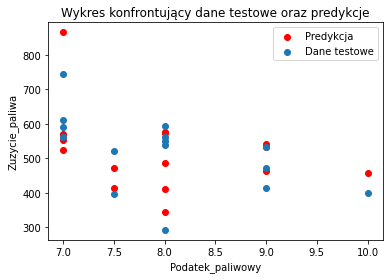

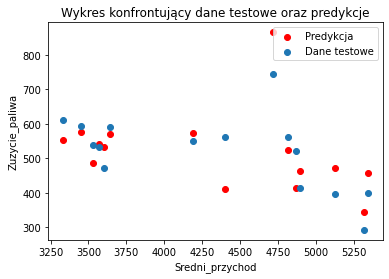

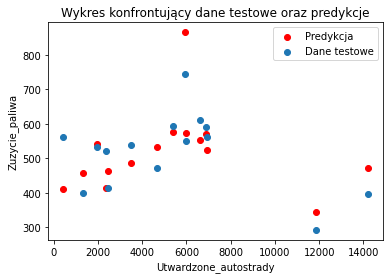

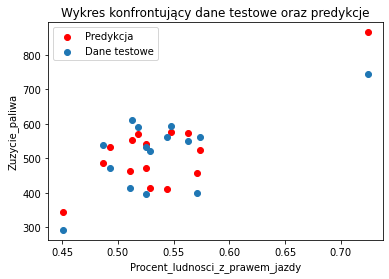

In [18]:
for i in df2.columns:
    if i == 'Zuzycie_paliwa':
        break
    plt.scatter(X_test[i], y_test, color='red')
    plt.scatter(X_test[i], y_pred)
    plt.title('Wykres konfrontujący dane testowe oraz predykcje')
    plt.xlabel(i)
    plt.ylabel('Zuzycie_paliwa')
    plt.legend(labels=['Predykcja', 'Dane testowe'])
    plt.show()

In [19]:
print(f'Średni błąd bezwzględny (Mean Absolute Error): {sklearn.metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Błąd średniokwadratowy (Mean Squared Error): {sklearn.metrics.mean_squared_error(y_test, y_pred)}')
print(f'Pierwiastek błędu średniokwadratowego (Root Mean Squared Error): {sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False)}')


Średni błąd bezwzględny (Mean Absolute Error): 59.31024277933994
Błąd średniokwadratowy (Mean Squared Error): 5019.3452115861965
Pierwiastek błędu średniokwadratowego (Root Mean Squared Error): 70.84733736412538


### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [20]:
# Realizacja zadania
df3 = pd.read_csv('HEART.csv')
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [21]:
df3.drop('slope', axis=1, inplace=True)
df3.drop('ca', axis=1, inplace=True)
df3.drop('thal', axis=1, inplace=True)
df3.replace('?', np.NaN, inplace=True)
df3.dropna(inplace=True)
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
5,32,0,2,105,198,0,0,165,0,0.0,0


In [22]:
df3.describe()

,age,sex,cp,oldpeak,num
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,47.770115,0.735632,3.003831,0.612261,0.375479
std,7.842244,0.441843,0.970718,0.931914,0.485177
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,65.000000,1.000000,4.000000,5.000000,1.000000


In [23]:
df3.shape

(261, 11)

In [24]:
cp = pd.get_dummies(df3['cp'], prefix='cp')
cp

,cp_1,cp_2,cp_3,cp_4
0,0,1,0,0
1,0,1,0,0
3,1,0,0,0
4,0,1,0,0
5,0,1,0,0
...,...,...,...,...
289,0,0,0,1
290,0,0,1,0
291,0,0,0,1
292,0,1,0,0


In [25]:
restecg = pd.get_dummies(df3['restecg'], prefix='restecg')
restecg

,restecg_0,restecg_1,restecg_2
0,0,0,1
1,1,0,0
3,0,1,0
4,0,1,0
5,1,0,0
...,...,...,...
289,1,0,0
290,0,1,0
291,1,0,0
292,1,0,0


In [26]:
df3.drop('cp', axis=1, inplace=True)
df3.drop('restecg', axis=1, inplace=True)

df3['cp_1'], df3['cp_2'], df3['cp_3'], df3['cp_4'] = cp['cp_1'], cp['cp_2'], cp['cp_3'], cp['cp_4']
df3['restecg_0'], df3['restecg_1'], df3['restecg_2'] = restecg['restecg_0'], restecg['restecg_1'], restecg['restecg_2']
df3

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2
0,28,1,130,132,0,185,0,0.0,0,0,1,0,0,0,0,1
1,29,1,120,243,0,160,0,0.0,0,0,1,0,0,1,0,0
3,30,0,170,237,0,170,0,0.0,0,1,0,0,0,0,1,0
4,31,0,100,219,0,150,0,0.0,0,0,1,0,0,0,1,0
5,32,0,105,198,0,165,0,0.0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160,331,0,94,1,2.5,1,0,0,0,1,1,0,0
290,54,0,130,294,0,100,1,0.0,1,0,0,1,0,0,1,0
291,56,1,155,342,1,150,1,3.0,1,0,0,0,1,1,0,0
292,58,0,180,393,0,110,1,1.0,1,0,1,0,0,1,0,0


In [27]:
y = df3["num       "]
df3.drop("num       ", axis=1, inplace=True)
X = df3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rmodel = linear_model.LogisticRegression(max_iter=10000)
rmodel.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [28]:
y_pred = rmodel.predict(X_test)
print(f'Dane testowe:\n{y_test.values}\n')
print(f'Dane uzyskane z predykcji:\n{y_pred}\n\n')
print(sklearn.metrics.classification_report(y_test, y_pred))

Dane testowe:
[0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0
 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1]

Dane uzyskane z predykcji:
[0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0
 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0]


              precision    recall  f1-score   support

           0       0.91      0.84      0.87        37
           1       0.68      0.81      0.74        16

    accuracy                           0.83        53
   macro avg       0.80      0.83      0.81        53
weighted avg       0.84      0.83      0.83        53

